# Task 2

Link to the datasets: https://arielacil-my.sharepoint.com/:u:/g/personal/rand_ariel_ac_il/EbcKOLRNLExFvxcOCpESGLMBRlP1f5WhX9EIpZJ7qAXi9g?e=tAycKc

**Dataset_2** - A more advance version of the former dataset containing much more attacks and endpoint (almost double). The data is also more complex with a higher randomization mechanism.

```
Dataset 2 baseline score:

                  precision    recall  f1-score   support

    Benign          0.98455   0.99178   0.98815     20812
    Malware         0.88889   0.80851   0.84680      1692

    accuracy                            0.97800     22504
    macro avg       0.93672   0.90015   0.91747     22504
    weighted avg    0.97735   0.97800   0.97752     22504
```

# Cisco - Ariel University API Security Detection Challenge 2023
## Baseline code


### Imports and global settings

In [1]:
# Imports, settings and first dataset view
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier

import pickle

# from ipywidgets import widgets

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 2  # Options are [1, 2, 3, 4]
test_type = 'label'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

request.headers.Host                         request.headers.User-Agent  \
0       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...   
1       127.0.0.1:5000  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...   
2       127.0.0.1:5000  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...   
3       127.0.0.1:5000  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...   
4       127.0.0.1:5000  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...   

  request.headers.Accept-Encoding request.headers.Accept  \
0               gzip, deflate, br                    */*   
1               gzip, deflate, br                    */*   
2               gzip, deflate, br                    */*   
3               gzip, deflate, br                    */*   
4               gzip, deflate, br                    */*   

  request.headers.Connection request.headers.Accept-Language  \
0                 keep-alive                           de-CH   
1                 keep-alive         en-US,en;q=0.9,he;q=0.8   
2                 keep-alive                           de-CH   
3                 keep-alive                  en-US,en;q=0.5   
4                 keep-alive         en-US,en;q=0.9,he;q=0.8   

  request.headers.Sec-Fetch-Site request.headers.Sec-Fetch-Mode  \
0                           none                    same-origin   
1                           none                    same-origin   
2                           none                      websocket   
3                           none                    same-origin   
4                           none                      websocket   

  request.headers.Sec-Fetch-User request.headers.Sec-Fetch-Dest  \
0                             ?1                       document   
1                             ?1                       document   
2                             ?1                       document   
3                             ?1                       document   
4                             ?1                       document   

                          request.headers.Set-Cookie  \
0  ['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...   
1  ['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...   
2  ['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...   
3  ['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...   
4  ['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...   

            request.headers.Date request.method  \
0  Fri, 11 Nov 2022 03:12:09 GMT            GET   
1  Fri, 11 Nov 2022 03:01:18 GMT            GET   
2  Fri, 11 Nov 2022 03:01:17 GMT            GET   
3  Fri, 11 Nov 2022 02:40:48 GMT            GET   
4  Fri, 11 Nov 2022 03:05:42 GMT            GET   

                                       request.url request.body  \
0   http://127.0.0.1:5000/static/download_txt/7115                
1          http://127.0.0.1:5000/about/random_page                
2       http://127.0.0.1:5000/categories/check/all                
3                http://127.0.0.1:5000/states/5911                
4  http://127.0.0.1:5000/orders/get/ship_via/10642                

  response.status response.headers.Content-Type  \
0   404 NOT FOUND              application/json   
1          200 OK      text/html; charset=utf-8   
2          200 OK              application/json   
3   404 NOT FOUND              application/json   
4   404 NOT FOUND              application/json   

  response.headers.Content-Length  response.status_code  \
0                              32                   404   
1                            1163                   200   
2                            1112                   200   
3                              33                   404   
4                              36                   404   

                                       response.body  \
0                        {"error": "File not found"}   
1  <figure><img src="https://img-c.udemycdn.com/r...   
2  [{"category_id": "1", "category_name": "Bevera...   
3                       {"error": "State not found"}  

### Basic dataset label arrangements

In [3]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method


def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

request.headers.Host  \
0            127.0.0.1:5000   
1            127.0.0.1:5000   
2            127.0.0.1:5000   
3            127.0.0.1:5000   
4            127.0.0.1:5000   
...                     ...   
127495       127.0.0.1:5000   
127496       127.0.0.1:5000   
127497       127.0.0.1:5000   
127498       127.0.0.1:5000   
127499       127.0.0.1:5000   

                               request.headers.User-Agent  \
0       Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...   
1       Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...   
2       Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...   
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...   
4       Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...   
...                                                   ...   
127495  Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...   
127496  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...   
127497  Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:25...   
127498  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....   
127499  Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....   

       request.headers.Accept-Encoding request.headers.Accept  \
0                    gzip, deflate, br                    */*   
1                    gzip, deflate, br                    */*   
2                    gzip, deflate, br                    */*   
3                    gzip, deflate, br                    */*   
4                    gzip, deflate, br                    */*   
...                                ...                    ...   
127495               gzip, deflate, br                    */*   
127496               gzip, deflate, br                    */*   
127497               gzip, deflate, br                    */*   
127498               gzip, deflate, br                    */*   
127499               gzip, deflate, br                    */*   

       request.headers.Connection request.headers.Accept-Language  \
0                      keep-alive                           de-CH   
1                      keep-alive         en-US,en;q=0.9,he;q=0.8   
2                      keep-alive                           de-CH   
3                      keep-alive                  en-US,en;q=0.5   
4                      keep-alive         en-US,en;q=0.9,he;q=0.8   
...                           ...                             ...   
127495                 keep-alive                  en-US,en;q=0.5   
127496                 keep-alive                              de   
127497                 keep-alive                              de   
127498                 keep-alive                           de-CH   
127499                 keep-alive                           de-CH   

       request.headers.Sec-Fetch-Site request.headers.Sec-Fetch-Mode  \
0                                none                    same-origin   
1                                none                    same-origin   
2                                none                      websocket   
3                                none                    same-origin   
4                                none                      websocket   
...                               ...                            ...   
127495                           none                      websocket   
127496                           none                      websocket   
127497                           none                      websocket   
127498                           none                      websocket   
127499                           none                    same-origin   

       request.headers.Sec-Fetch-User request.headers.Sec-Fetch-Dest  \
0                                  ?1                       document   
1                                  ?1                       document   
2                                  ?1                       document   
3                                  ?1                       document   
4                                  ?1                       docume

In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   request.headers.Host             127500 non-null  object
 1   request.headers.User-Agent       127500 non-null  object
 2   request.headers.Accept-Encoding  127500 non-null  object
 3   request.headers.Accept           127500 non-null  object
 4   request.headers.Connection       127500 non-null  object
 5   request.headers.Accept-Language  127500 non-null  object
 6   request.headers.Sec-Fetch-Site   127500 non-null  object
 7   request.headers.Sec-Fetch-Mode   127500 non-null  object
 8   request.headers.Sec-Fetch-User   127500 non-null  object
 9   request.headers.Sec-Fetch-Dest   127500 non-null  object
 10  request.headers.Set-Cookie       127500 non-null  object
 11  request.headers.Date             127500 non-null  object
 12  request.method  

In [5]:
list_of_nan_for_more_than_90 = []
for col in df.columns:
    if df[col].isna().sum() / df.shape[0] * 100 > 90:
        list_of_nan_for_more_than_90.append(col)
        print(f"Column {col} has {df[col].isna().sum()} NaN values, which is {round(df[col].isna().sum() / df.shape[0] * 100, 2)}%, and has {df[col].nunique()} unique values")

Column response.headers.Location has 120569 NaN values, which is 94.56%, and has 2 unique values
Column request.headers.Cookie has 125104 NaN values, which is 98.12%, and has 38 unique values
Column request.headers.Content-Length has 126292 NaN values, which is 99.05%, and has 1 unique values
Column response.headers.Set-Cookie has 126292 NaN values, which is 99.05%, and has 1 unique values


In [6]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

request.headers.Host                         request.headers.User-Agent  \
0       127.0.0.1:5000  Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...   
1       127.0.0.1:5000  Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...   
2       127.0.0.1:5000  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...   
3       127.0.0.1:5000  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...   
4       127.0.0.1:5000  Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...   

  request.headers.Accept-Encoding request.headers.Accept  \
0               gzip, deflate, br                    */*   
1               gzip, deflate, br                    */*   
2               gzip, deflate, br                    */*   
3               gzip, deflate, br                    */*   
4               gzip, deflate, br                    */*   

  request.headers.Connection request.headers.Accept-Language  \
0                 keep-alive                           de-CH   
1                 keep-alive         en-US,en;q=0.9,he;q=0.8   
2                 keep-alive                           de-CH   
3                 keep-alive                  en-US,en;q=0.5   
4                 keep-alive         en-US,en;q=0.9,he;q=0.8   

  request.headers.Sec-Fetch-Site request.headers.Sec-Fetch-Mode  \
0                           none                    same-origin   
1                           none                    same-origin   
2                           none                      websocket   
3                           none                    same-origin   
4                           none                      websocket   

  request.headers.Sec-Fetch-User request.headers.Sec-Fetch-Dest  \
0                             ?1                       document   
1                             ?1                       document   
2                             ?1                       document   
3                             ?1                       document   
4                             ?1                       document   

                          request.headers.Set-Cookie  \
0  ['ck=w6oM9XV_jvWjuuVd3hLe3eSdXXPydbyfsLwTlj4Mc...   
1  ['ck=c8uOUXcCTGAn3VPZ7KkmjeGl7T4m7z5hvteH_e4NP...   
2  ['ck=RKquq_BCt65ARAQ2BjFcYW58e4Hr_JMvmHA71wfu8...   
3  ['ck=RhHVh7pmM73Qp434tecicojVb27D_OtIVbYPqWaqj...   
4  ['ck=DBFNGnjseloXLj_cxqJe3QTz-J1XS4kaCpMWDl60G...   

            request.headers.Date request.method  \
0  Fri, 11 Nov 2022 03:12:09 GMT            GET   
1  Fri, 11 Nov 2022 03:01:18 GMT            GET   
2  Fri, 11 Nov 2022 03:01:17 GMT            GET   
3  Fri, 11 Nov 2022 02:40:48 GMT            GET   
4  Fri, 11 Nov 2022 03:05:42 GMT            GET   

                                       request.url request.body  \
0   http://127.0.0.1:5000/static/download_txt/7115                
1          http://127.0.0.1:5000/about/random_page                
2       http://127.0.0.1:5000/categories/check/all                
3                http://127.0.0.1:5000/states/5911                
4  http://127.0.0.1:5000/orders/get/ship_via/10642                

  response.status response.headers.Content-Type  \
0   404 NOT FOUND              application/json   
1          200 OK      text/html; charset=utf-8   
2          200 OK              application/json   
3   404 NOT FOUND              application/json   
4   404 NOT FOUND              application/json   

  response.headers.Content-Length  response.status_code  \
0                              32                   404   
1                            1163                   200   
2                            1112                   200   
3                              33                   404   
4                              36                   404   

                                       response.body  \
0                        {"error": "File not found"}   
1  <figure><img src="https://img-c.udemycdn.com/r...   
2  [{"category_id": "1", "category_name": "Bevera...   
3                       {"error": "State not found"}  

In [7]:
# Detect columns that have the same value for all rows and print them
from collections import Counter
for column in df.columns:
    if len(Counter(df[column])) == 1:
        print(column)

request.headers.Host
request.headers.Accept
request.headers.Connection
request.headers.Sec-Fetch-User
request.body


In [8]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                  'request.headers.Host',
                  'request.method',
                  'request.headers.Accept-Language',
                  'request.headers.Sec-Fetch-Site',
                  'request.headers.Sec-Fetch-Mode',
                  'request.headers.Sec-Fetch-Dest',
                  'response.status',
                  ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                   'request.headers.Set-Cookie',
                   'request.headers.Date',
                   'request.url',
                   'response.headers.Content-Type',
                   'response.body',
                   'response.headers.Location',
                   'request.headers.Content-Length',
                   'request.headers.Cookie',
                   'response.headers.Set-Cookie'
                   ]

COLUMNS_TO_REMOVE = ['request.body',
                     'response.headers.Content-Length',
                     'request.headers.Date',
                     'request.headers.Accept',
                     'request.headers.Connection',
                     'request.headers.Sec-Fetch-User',
                     ]

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models


def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS:
        df[column] = le.fit_transform(df[column])

    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS:
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

request.headers.Host  request.headers.User-Agent  \
0                     0                   -0.755929   
1                     0                    0.000000   
2                     0                   -0.408248   
3                     0                    0.666667   
4                     0                   -0.471405   

   request.headers.Accept-Encoding  request.headers.Accept-Language  \
0                                0                                1   
1                                0                                3   
2                                0                                1   
3                                0                                2   
4                                0                                3   

   request.headers.Sec-Fetch-Site  request.headers.Sec-Fetch-Mode  \
0                               0                               0   
1                               0                               0   
2                               0                               1   
3                               0                               0   
4                               0                               1   

   request.headers.Sec-Fetch-Dest  request.headers.Set-Cookie  request.method  \
0                               0                   -0.646997               0   
1                               0                   -0.480384               0   
2                               0                    0.426401               0   
3                               0                   -0.593391               0   
4                               0                   -0.652753               0   

   request.url  response.status  response.headers.Content-Type  \
0     0.408248                4                           -1.0   
1     0.000000                0                           -1.0   
2     0.707107                0                           -1.0   
3     0.577350                4                           -1.0   
4     0.377964                4                           -1.0   

   response.status_code  response.body  response.headers.Location  \
0                   404       0.408248                       -1.0   
1                   200       0.956183                       -1.0   
2                   200      -0.255551                       -1.0   
3                   404       0.408248                       -1.0   
4                   404       0.894427                       -1.0   

   request.headers.Cookie  request.headers.Content-Length  \
0                    -1.0                            -1.0   
1                    -1.0                            -1.0   
2                    -1.0                            -1.0   
3                    -1.0                            -1.0   
4                    -1.0                            -1.0   

   response.headers.Set-Cookie attack_type   label  
0                         -1.0      Benign  Benign  
1                         -1.0      Benign  Benign  
2                         -1.0      Benign  Benign  
3                         -1.0      Benign  Benign  
4                         -1.0      Benign  Benign

In [9]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   request.headers.Host             127500 non-null  int64  
 1   request.headers.User-Agent       127500 non-null  float64
 2   request.headers.Accept-Encoding  127500 non-null  int64  
 3   request.headers.Accept-Language  127500 non-null  int64  
 4   request.headers.Sec-Fetch-Site   127500 non-null  int64  
 5   request.headers.Sec-Fetch-Mode   127500 non-null  int64  
 6   request.headers.Sec-Fetch-Dest   127500 non-null  int64  
 7   request.headers.Set-Cookie       127500 non-null  float64
 8   request.method                   127500 non-null  int64  
 9   request.url                      127500 non-null  float64
 10  response.status                  127500 non-null  int64  
 11  response.headers.Content-Type    127500 non-null  float64
 12  re

In [10]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie', 'request.headers.Content-Length', 'response.headers.Set-Cookie']


request.headers.Host                 int64
request.headers.User-Agent         float64
request.headers.Accept-Encoding      int64
request.headers.Accept-Language      int64
request.headers.Sec-Fetch-Site       int64
request.headers.Sec-Fetch-Mode       int64
request.headers.Sec-Fetch-Dest       int64
request.headers.Set-Cookie         float64
request.method                       int64
request.url                        float64
response.status                      int64
response.headers.Content-Type      float64
response.status_code                 int64
response.body                      float64
response.headers.Location          float64
request.headers.Cookie             float64
request.headers.Content-Length     float64
response.headers.Set-Cookie        float64
attack_type                         object
label                               object
dtype: object

# NOT SURE AREA

##### START

In [11]:
# # Feature selection
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold

# # Split the data to train and test
# X_train, X_test, y_train, y_test = train_test_split(df[features_list], df[test_type], test_size=0.2, random_state=42)

# # Create the RFE object and compute a cross-validated score.
# # The "accuracy" scoring is proportional to the number of correct classifications
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
# rfecv.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [12]:
# Data exploration
def plot_pie_chart(df, column_name):
    fig = px.pie(df, values=column_name, names=column_name)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [15]:
plot_pie_chart(df, 'label')

##### END

In [16]:
ss = StandardScaler()

In [17]:
pca = PCA(n_components=2)

In [18]:
# x_after_pca_in_2D=pca.fit_transform(df[features_list].to_numpy())
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

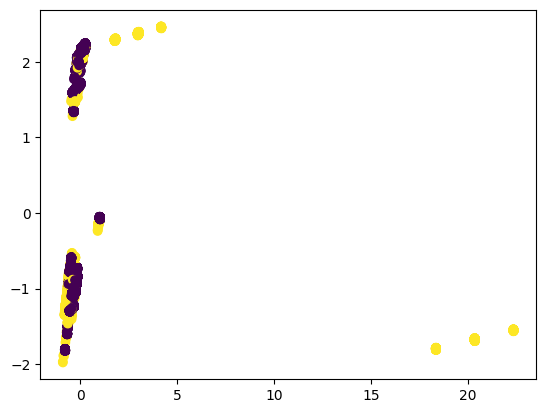

In [19]:
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df['label'].map({'Benign': 0, 'Malware': 1}))

In [20]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

As we can see we can compress the data into 14 components without loosing any information.

## Train test split

In [21]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list]#.to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(104996, 18) (104996,)
(22504, 18) (22504,)


Counter({'Benign': 117914, 'Malware': 9586})

In [41]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [42]:
pca = PCA(14)
pca.fit(X_train)
# x_train_pca = pca.transform(X_train)
# x_train_pca_real = pca.transform(X_train)
x_train_pca = X_train

In [43]:
# x_test_pca = pca.transform(X_test)
# x_test_pca_real = pca.transform(X_test)
x_test_pca = X_test

In [26]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.barh(range(x_train_pca.shape[1]), model.feature_importances_, align="center")
    plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
    plt.ylim([-1, x_train_pca.shape[1]])
    plt.show()

In [ ]:
# Feature selection with Random Forest Classifier

rfc_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(rfc_fs)

In [ ]:
# Feature selection with AdaBoost Classifier

abc_fs = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(abc_fs)

In [ ]:
# Feature selection with Gradient Boosting Classifier

gbc_fs = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_fs.fit(x_train_pca, y_train)

# Plot the feature importances of the forest
plot_feature_importance(gbc_fs)

In [ ]:
# Feature importance with Linear SVC
 
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train_pca, y_train)
lsvc.coef_

# Plot feature importance with Linear SVC
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(x_train_pca.shape[1]), lsvc.coef_[0], align="center")
plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
plt.ylim([-1, x_train_pca.shape[1]])
plt.show()


In [ ]:
# Feature selection with Decision Tree Classifier

dtc_fs = DecisionTreeClassifier(random_state=42)
dtc_fs.fit(x_train_pca, y_train)

plot_feature_importance(dtc_fs)

In [ ]:
# Feature selection with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc_fs.fit(x_train_pca, y_train)

plot_feature_importance(etc_fs)

In [ ]:
# Print the feature ranking - Top 10
fs_table = pd.DataFrame(columns=['Feature', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Linear SVC', 'Decision Tree', 'Extra Trees'])
fs_table['Feature'] = features_list
fs_table['Random Forest'] = rfc_fs.feature_importances_

fs_table['AdaBoost'] = abc_fs.feature_importances_
fs_table['Gradient Boosting'] = gbc_fs.feature_importances_
fs_table['Linear SVC'] = np.abs(lsvc.coef_[0])
fs_table['Decision Tree'] = dtc_fs.feature_importances_
fs_table['Extra Trees'] = etc_fs.feature_importances_

fs_table['Mean'] = fs_table.mean(axis=1)
fs_table.sort_values(by='Mean', ascending=False, inplace=True)
fs_table.head(15)

In [ ]:
# x_train_pca = x_train_pca[:, fs_table['Mean'].head(15).index]
# x_test_pca = x_test_pca[:, fs_table['Mean'].head(15).index]

Optimal number of features : 9


/home/nonofurbuisness/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



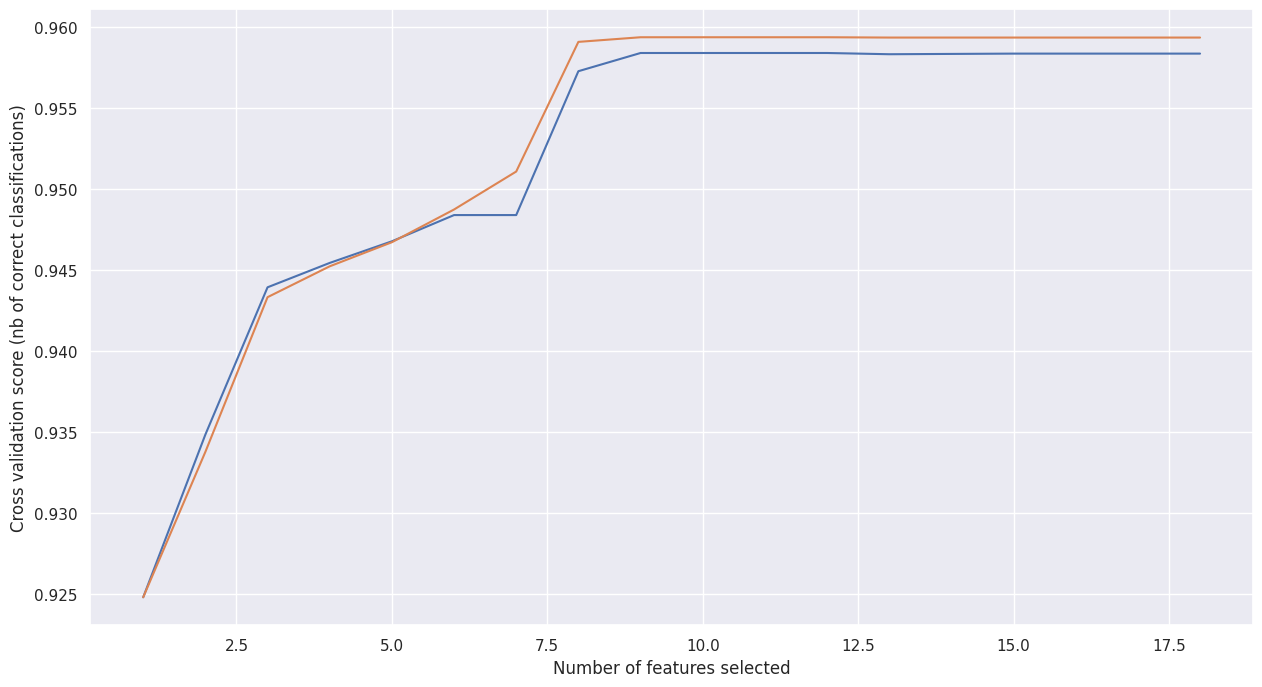

In [44]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x_train_pca, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

x_train_pca = rfecv.transform(x_train_pca)
x_test_pca = rfecv.transform(x_test_pca)

In [32]:
def create_grid_search(model, params):
    # Create a grid search object which is used to find the best hyperparameters for the model
    return GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=3, cv=3, scoring='accuracy', return_train_score=True)

In [33]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):

    df = pd.DataFrame(results)
    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build colorscale
    color = np.zeros(len(df), dtype='uint8')
    colorscale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'], y=df['mean_test_score'], marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'blue'}}, unselected={'marker': {'opacity': 0.3}}), go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,line={'colorscale': colorscale, 'cmin': 0,'cmax': 1, 'color': color, 'shape': 'hspline'})])

    fig.update_layout(
        height=800, xaxis={'title': 'STD Score'},
        yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

    # Update color callback
    def update_color(trace, points, state):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)
    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

## Model choosing and fitting

In [45]:
# Random forest is an ensemble learning method that uses multiple decision trees to make predictions.
# It is a robust and flexible model that can handle high-dimensional and complex data,
# making it a good choice for API classification tasks.

rf = RandomForestClassifier()
rf_param = {
    "n_estimators": [150, 250, 750],
    "criterion": ["gini", "entropy"],
    "max_depth": [20],
    "min_samples_split": [2],
    "random_state": [43],
}
rf_gcv = create_grid_search(rf, rf_param)

In [46]:
rf_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.980, test=0.980) total time=   9.2s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.980, test=0.979) total time=  10.3s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=150, random_state=43;, score=(train=0.980, test=0.980) total time=  10.6s
[CV 1/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.980, test=0.980) total time=  14.8s
[CV 3/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.980, test=0.980) total time=  15.3s
[CV 2/3] END criterion=gini, max_depth=20, min_samples_split=2, n_estimators=250, random_state=43;, score=(train=0.980, test=0.979) total time=  17.6s
[CV 1/3] END criterion=entropy, ma

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_split': [2],
                         'n_estimators': [150, 250, 750],
                         'random_state': [43]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [47]:
# plot_grid_search_results(rf_gcv.cv_results_)

In [48]:
print("Best parameters: ", rf_gcv.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 750, 'random_state': 43}


In [49]:
clf = rf_gcv.best_estimator_

In [50]:
# Save the model
filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model.sav"
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

      Benign    0.97902   1.00000   0.98940     20812
     Malware    1.00000   0.73641   0.84820      1692

    accuracy                        0.98018     22504
   macro avg    0.98951   0.86820   0.91880     22504
weighted avg    0.98060   0.98018   0.97878     22504



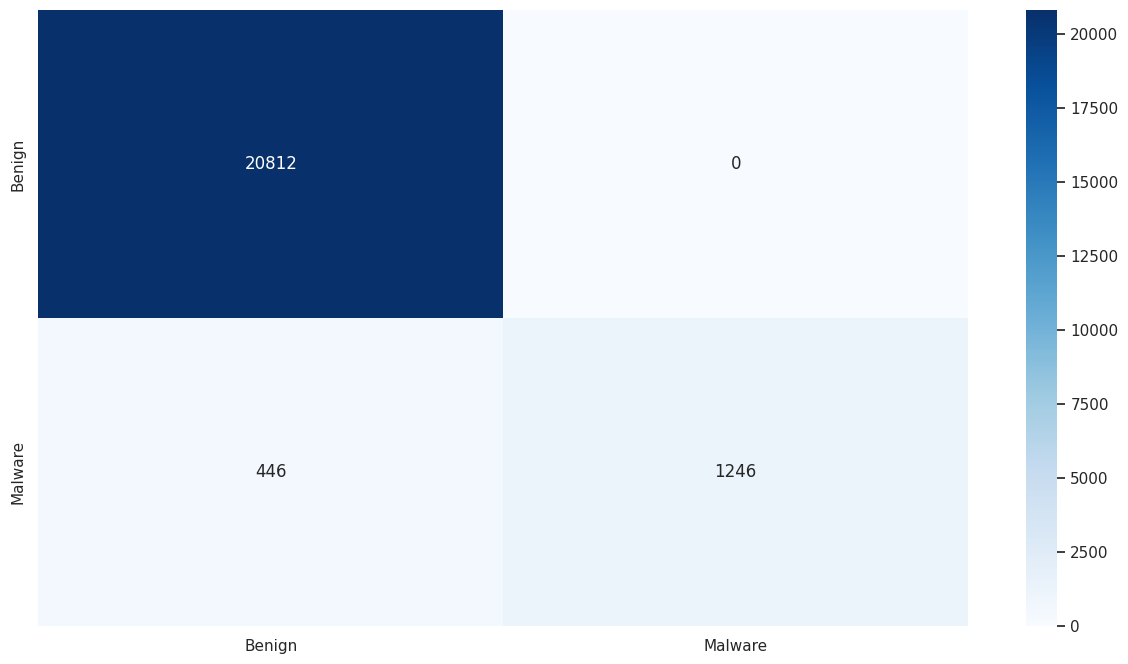

In [51]:
show(clf)

In [ ]:
# Support vector machines are a popular choice for classification tasks, including API classification.
# They work by finding the hyperplane in a high-dimensional space that maximally
# separates different classes of data points.

svc = SVC(cache_size=500)
svc_param = {
    "C": [1, 2, 3],
    "kernel": ["poly", "rbf"],
    "probability": [True],
}
svc_gcv = create_grid_search(svc, svc_param)

In [ ]:
svc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(svc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", svc_gcv.best_params_)

In [ ]:
svc = svc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/svc"+str(dataset_number)+"_model.sav"
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
show(svc)

In [ ]:
# Logistic regression is a simple yet effective linear model for classification tasks.
# It is particularly useful for predicting binary outcomes
# (e.g., malicious vs benign) and is often used as a baseline
# model for comparison with more complex models.

lr = LogisticRegression()
lr_param = {
    "C": [1, 2, 3],
    "penalty": ["l2"],
}
lr_gcv = create_grid_search(lr, lr_param)

In [ ]:
lr_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(lr_gcv.cv_results_)

In [ ]:
print("Best parameters: ", lr_gcv.best_params_)

In [ ]:
lr = lr_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/lr"+str(dataset_number)+"_model.sav"
pickle.dump(lr, open(filename, 'wb'))

In [ ]:
show(lr)

In [ ]:
# KNN is a simple yet effective classification algorithm that works by finding the k nearest neighbors of a data point.
# It is a non-parametric model that does not make any assumptions about the underlying data distribution.

knn = KNeighborsClassifier()
knn_param = {
    "n_neighbors": [3 ,4, 5, 7, 9, 11, 13, 15],
    "weights": ["uniform", "distance"],
}
knn_gcv = create_grid_search(knn, knn_param)

In [ ]:
knn_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(knn_gcv.cv_results_)

In [ ]:
print("Best parameters: ", knn_gcv.best_params_)

In [ ]:
knn = knn_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/knn"+str(dataset_number)+"_model.sav"
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
show(knn)

In [ ]:
# Decision trees are a popular choice for classification tasks.
# They work by recursively partitioning the feature space into smaller and smaller regions,
# until each region contains only a single class of data points.

dt = DecisionTreeClassifier()
dt_param = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9, 11, 13, 15],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}
dt_gcv = create_grid_search(dt, dt_param)

In [ ]:
dt_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(dt_gcv.cv_results_)

In [ ]:
print("Best parameters: ", dt_gcv.best_params_)

In [ ]:
dt = dt_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/dt"+str(dataset_number)+"_model.sav"
pickle.dump(dt, open(filename, 'wb'))

In [ ]:
show(dt)

In [ ]:
# AdaBoost is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

abc = AdaBoostClassifier()
abc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
abc_gcv = create_grid_search(abc, abc_param)

In [ ]:
abc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(abc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", abc_gcv.best_params_)

In [ ]:
abc = abc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/abc"+str(dataset_number)+"_model.sav"
pickle.dump(abc, open(filename, 'wb'))

In [ ]:
show(abc)

In [ ]:
# Gradient Boosting is a popular ensemble method that works by combining the predictions of multiple weak learners.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

gbc = GradientBoostingClassifier()
gbc_param = {
    "n_estimators": [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    "learning_rate": [0.001, 0.01, 0.1, 1, 10, 100],
}
gbc_gcv = create_grid_search(gbc, gbc_param)

In [ ]:
gbc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(gbc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", gbc_gcv.best_params_)

In [ ]:
gbc = gbc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/gbc"+str(dataset_number)+"_model.sav"
pickle.dump(gbc, open(filename, 'wb'))

In [ ]:
show(gbc)

In [ ]:
# Neural networks are a popular choice for classification tasks.
# They work by learning the weights of the connections between neurons in the network.

mlp = MLPClassifier()
mlp_param = {
    "hidden_layer_sizes": [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100), (100, 100, 100, 100, 100, 100)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "early_stopping": [True],
}
mlp_gcv = create_grid_search(mlp, mlp_param)

In [ ]:
mlp_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(mlp_gcv.cv_results_)

In [ ]:
print("Best parameters: ", mlp_gcv.best_params_)

In [ ]:
mlp = mlp_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/mlp"+str(dataset_number)+"_model.sav"
pickle.dump(mlp, open(filename, 'wb'))

In [ ]:
show(mlp)

In [ ]:
# Voting classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

vc = VotingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)])
vc_param = {
    "weights": [[1,1,1,1,1,1,1,1], [2,1,1,1,1,1,1,1], [1,2,1,1,1,1,1,1], [1,1,2,1,1,1,1,1], [1,1,1,2,1,1,1,1], [1,1,1,1,2,1,1,1], [1,1,1,1,1,2,1,1], [1,1,1,1,1,1,2,1], [1,1,1,1,1,1,1,2]],
    "voting": ["hard", "soft"],
}
vc_gcv = create_grid_search(vc, vc_param)

In [ ]:
vc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(vc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", vc_gcv.best_params_)

In [ ]:
vc = vc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/vc"+str(dataset_number)+"_model.sav"
pickle.dump(vc, open(filename, 'wb'))

In [ ]:
show(vc)

In [ ]:
# Stacking classifier is a meta-classifier that combines the predictions of multiple classifiers.
# It is a simple way to improve the performance of a model by combining the predictions of multiple models.

sc = StackingClassifier(estimators=[("clf",clf),("svc",svc),("lr",lr),("knn",knn),("dt",dt),("abc",abc),("gbc",gbc),("mlp",mlp)], final_estimator=LogisticRegression())
sc_param = {
    "final_estimator__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}
sc_gcv = create_grid_search(sc, sc_param)

In [ ]:
# Print size of x_train_pca
print(x_train_pca.shape)


In [ ]:
sc_gcv.fit(x_train_pca, y_train)

In [ ]:
# plot_grid_search_results(sc_gcv.cv_results_)

In [ ]:
print("Best parameters: ", sc_gcv.best_params_)

In [ ]:
sc = sc_gcv.best_estimator_

In [ ]:
# Save the model
filename = "Model/"+str(dataset_number)+"/sc"+str(dataset_number)+"_model.sav"
pickle.dump(sc, open(filename, 'wb'))

In [ ]:
show(sc)

In [ ]:
# Choose the best model

models = [clf,svc,lr,knn,dt,abc,gbc,mlp,vc,sc]
model_names = ["Random Forest","SVM","Logistic Regression","KNN","Decision Tree","AdaBoost","Gradient Boosting","Neural Network","Voting Classifier","Stacking Classifier"]
model_scores = []

for model in models:
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    model_report = classification_report(true_labels, predictions, digits=5)
    model_scores.append(model_report.split()[12])

best_model = models[model_scores.index(max(model_scores))]
best_model_name = model_names[model_scores.index(max(model_scores))]
best_model_score = max(model_scores)
print("Best model: " + best_model_name)
print("Score: " + str(best_model_score))
model_report = classification_report(true_labels, predictions, digits=5)
print(model_report)

## Result printout

In [2]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

# Test

In [59]:
# Now it's your turn, use the model you have just created :)

# Read the valuation json, preprocess it and run your model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df.fillna(' ', inplace=True)
test_df = vectorize_df(test_df)

# Predict with your model and use rfecv to select the best features
X = test_df[features_list].to_numpy()
X = rfecv.transform(X)
predictions = clf.predict(X)

# Save your predictions

In [69]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')